# Neural Network

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [72]:
filePath = "bank-additional\\bank-additional\\bank-additional-full.csv"
data = pd.read_csv(filePath, sep=";")

## Preprocessing

### Encoding categorical variables
Transforming non-numeric labels into numeric labels.

In [73]:
categorical_label_encoder = LabelEncoder()

for variable in data.select_dtypes(include=["object"]).columns:
    data[variable] = categorical_label_encoder.fit_transform(data[variable])

### Seperating features and target
Seperating/Dropping the target variable (AKA the output variable) from the features (input variables). This is done because the model the target variable itself isn't used to train the model, instead the features are to train the model in order to predict the target variable; therefore, to prevent the model from learning incorrect patterns and because the model is evaluated on the target variable, it is necessary to drop the target variable.

In [74]:
features = data.drop("y", axis=1)
target = data["y"]

### Standardization
The aim of Standardization is to increase data quality through eliminating errors, inconsistencies and redundant data. Through having a higher quality dataset, the model will be able to learn patterns from more verbose data leading to better predictions.

In [75]:
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features)

### Train Test Split
A dataset is split into two parts, the training dataset and the testing dataset. This done so a model can be tested/evaluated after training it, without testing the model, it won't be possbile to find out whether a it is underfitted or overfitted (Bias-Variance Tradeoff).

In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, train_size=0.8, test_size=0.2, random_state=42)

## Creating the Neural Network Model

This model will be using a Multilayer Perceptron with an input layer, a hidden layer and an output layer. 

In [77]:
number_of_features = features.shape[1]
number_of_features

20

### Deciding the Number of Neurons

#### Deciding the Number of Neurons in the Input Layer and the Output Layer
Since there are 20 inputs, there will be 20 neurons in the input layer. Since an instance can only be classified into one of two types, this model is using **Binary Classification**, therefore it will be using one neuron for the output.

#### Deciding the Number of Neurons in the Hidden Layer/Layers
However, deciding the number of Neurons in the hidden layers, or in this case, the hidden layer is not as straightforward as the other layers. The complexity of the dataset (dimensionality, sample size, noise, distribution, etc) and whether the model is underfit or overfit has an effect on how many neurons should be in the hidden layer.

According to [The Number of Hidden Layers](https://www.heatonresearch.com/2017/06/01/hidden-layers.html), there are a few rules of thumb for determining the number of neurons in a hidden layer (Additionally, this article discusses about Deep Learning and why multiple hidden layers are used despite the Universal Approximation Theorem proving that a single hidden layer neural network can learn anything). 

1. The average of the sum of the number of Input and Output Neurons.
2. Sum of 2/3rds of the number of Input Neurons and the number of Output Neurons.
3. Less than two times the number of Input Neurons

The first heuristic tends to give a smaller number of hidden neurons, since there are benefits to a smaller networks such as a faster training time and being less prone to overfitting, therefore we will be deciding hte number of hidden neurons by getting the average of the sum of of the number of Input and Output Neurons.

In [78]:
number_of_input_neurons = number_of_features
number_of_output_neurons = 1
number_of_hidden_neurons = math.ceil((number_of_input_neurons + number_of_output_neurons) / 2)
number_of_hidden_neurons

11

### Deciding the Activation Function
For the activation function, ReLU will be due to the fact that it is simple and efficient, it is also the standard activation function that is used for classification tasks, with other functions such as sigmoid or Tanh being used for situations where ReLU isn't optimal.

### Coding the Model

In [79]:
input_layer = Dense(number_of_input_neurons, input_shape=(number_of_features,))
hidden_layer = Dense(number_of_hidden_neurons, activation="relu")
output_layer = Dense(number_of_output_neurons)

neural_network_model = Sequential([input_layer, hidden_layer, output_layer])

c:\Users\Mail2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling

#### Optimizer
An Optimizer modifies the weights during training to reduce the difference between predicted values and actual values, also known as **'Loss'**. There are many optimizers such as Gradient Descent, Stochastic Gradient Descent, RMSprop, Adam, etc. Optimizers are divided into two groups according to how the **learning rate** is modified. If you have to manually tune the learning rate, it is a **Gradient Descent Algorithm** and if it can automatically adapt, it is a **Adaptive Algorithm**. This model will be using an Adaptive Optimizer called **'Adam'** due to its ease of use.

#### Loss Function
A Loss Function is used to measure how well a model can predict values, this is done by taking the difference between a predicted value and its corresponding actual value, the difference between these two are called **'Loss'**. This model will be using **Binary Cross Entropy** also known as **Logarithmic Loss** or **Log Loss**, this loss function is being used because it makes the model more likely to have output values close to 0 or 1 and because it is standard for binary classification.

The aforementioned Optimizer uses the loss from a loss function to modify the weights during training.

In [80]:
neural_network_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Training The Neural Network Model
### Batch Size
The Batch Size is a hyperparameter that defines the **number of samples/datapoints** to work through before updating the model's internal parameters as weights, biases, etc.

Batches are used because updating the parameters on the entire training dataset is computationally expensive (unless the dataset is small) and because it leads to a shorter training time. However having a large batch size might mean that the model is less accurate and prone to overfitting.

### Number of Epochs
The Number of Epochs is a hyperparameter that defines the **number of training iterations** for the model.

As the model goes through each epoch, its parameters are updated and patterns in the dataset are learned. It is important to have a balanced amount of epochs as too few leads to underfitting and the inability of the model to extract patterns from the dataset and on the other hand, having too many epochs leads to the model being overfit, which leads to poor predictions on new data.


In [81]:
trained_neural_network = neural_network_model.fit(X_train, y_train, batch_size=32, epochs=32, validation_split=0.2, verbose=1)

Epoch 1/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7121 - loss: 3.1722 - val_accuracy: 0.8859 - val_loss: 0.9870
Epoch 2/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8878 - loss: 0.9635 - val_accuracy: 0.8850 - val_loss: 0.8859
Epoch 3/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8732 - loss: 1.0208 - val_accuracy: 0.8127 - val_loss: 1.5647
Epoch 4/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8706 - loss: 1.0628 - val_accuracy: 0.8920 - val_loss: 0.8399
Epoch 5/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8970 - loss: 0.8878 - val_accuracy: 0.8968 - val_loss: 0.7047
Epoch 6/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8973 - loss: 0.6861 - val_accuracy: 0.8774 - val_loss: 0.6710
Epoch 7/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8974 - loss: 0.6219 - val_accuracy: 0.9027 - val_loss: 0.5604
Epoch 8/32
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9012 - loss: 0.6154 - val_accuracy: 0.

## Testing

In [82]:
predictions = (neural_network_model.predict(X_test) > 0.5).astype("int32")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Accuracy Score

In [83]:

model_accuracy_score = accuracy_score(y_test, predictions)
print(model_accuracy_score)

0.906409322651129


### Confusion Matrix
From the Confusion Matrix, it can be observed that the model fails in predicting positive values AKA the potential customer subscribing, this is due to a large class imbalance in the dataset causing the model to favour the majority class of 'no' over the minority class of 'yes'.

[[7191  112]
 [ 659  276]]


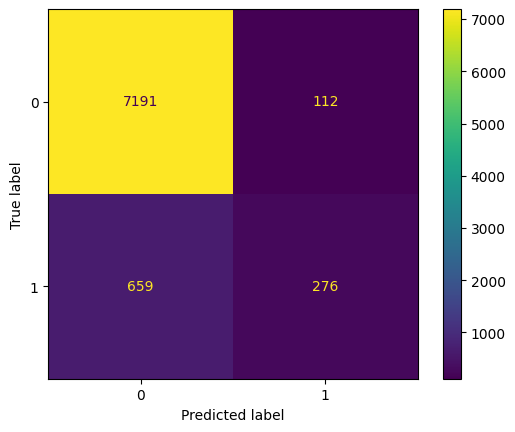

In [84]:
model_confusion_matrix = confusion_matrix(y_test, predictions)
print(model_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=model_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

### Classification Report
Although the model performs well on the majority class, as seen by the low precision, recall and other metrics; it can be concluded that the model fails in predicting whether a potential customer will subscribe. 

This failure can be attirbuted to the dataset as a whole and therefore the training dataset too, having significantly more samples with a class of 'no' (coded as '0') as opposed to samples of class 'yes' (coded as '1')

In [85]:

model_classification_report = classification_report(y_test, predictions)
print(model_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.71      0.30      0.42       935

    accuracy                           0.91      8238
   macro avg       0.81      0.64      0.68      8238
weighted avg       0.89      0.91      0.89      8238



## How To Handle Imbalanced Data?
There are multiple techniques to handle Imbalanced data such as Ensemble models, resampling with a different ratio, etc however experiments will be run on this model by resampling the training set. There are two methods of resampling **Under-Sampling** and **Over-Sampling**.

### Under-Sampling
In Under-Sampling, the class imbalance is solved through reducing the number of samples in the majority class to match the minority class. This is typically done on very large datasets as the reduction in the number of data samples causes a decrease in performance from the loss of information, this is known as **Underfitting**.

In [86]:
random_under_sampler = RandomUnderSampler(random_state=42)
undersampled_X_train, undersampled_y_train = random_under_sampler.fit_resample(X_train, y_train)

trained_undersampled_neural_network = neural_network_model.fit(undersampled_X_train, undersampled_y_train, batch_size=32, epochs=32, validation_split=0.2, verbose=1)

undersampled_predictions = (neural_network_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7999 - loss: 0.4315 - val_accuracy: 0.7449 - val_loss: 0.5239
Epoch 2/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.4241 - val_accuracy: 0.7416 - val_loss: 0.5454
Epoch 3/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3958 - val_accuracy: 0.6815 - val_loss: 0.6206
Epoch 4/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3772 - val_accuracy: 0.7557 - val_loss: 0.5224
Epoch 5/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.3748 - val_accuracy: 0.7827 - val_loss: 0.4839
Epoch 6/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3879 - val_accuracy: 0.7706 - val_loss: 0.5058
Epoch 7/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.4145 - val_accuracy: 0.7848 - val_loss: 0.5098
Epoch 8/32
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.3755 - val_accuracy: 0.

#### Accuracy Score

In [87]:
undersampled_accuracy_score = accuracy_score(y_test, undersampled_predictions)
print(undersampled_accuracy_score)

0.8593105122602573


#### Confusion Matrix

[[6274 1029]
 [ 130  805]]


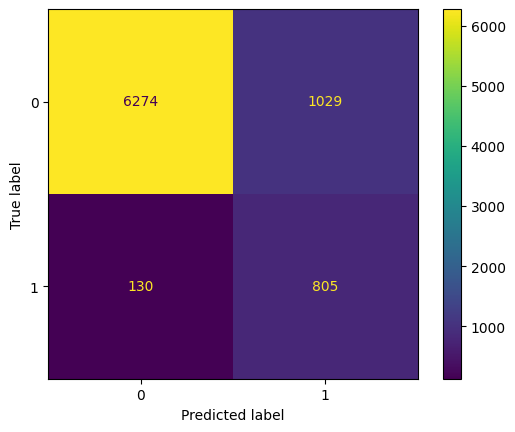

In [88]:
undersampled_confusion_matrix = confusion_matrix(y_test, undersampled_predictions)
print(undersampled_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=undersampled_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

#### Classification Report

In [89]:
undersampled_classification_report = classification_report(y_test, undersampled_predictions)
print(undersampled_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7303
           1       0.44      0.86      0.58       935

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



### Over-Sampling
In Over-Sampling, the class imbalance is solved through increasing the number of samples in the minority class to match the majority class. This is done when the model cannot afford to reduce the number of data samples through Under-Sampling. There are different techniques of Over-Sampling such as Bootstrapping, SMOTE, etc.

Since the bank-additional dataset is not a small dataset but a medium dataset, SMOTE will be used over Bootstrapping.

In [90]:
smote = SMOTE(random_state=42)
oversampled_X_train, oversampled_y_train = smote.fit_resample(X_train, y_train)

trained_oversampled_neural_network = neural_network_model.fit(oversampled_X_train, oversampled_y_train, batch_size=32, epochs=32, validation_split=0.2, verbose=1)

oversampled_predictions = (neural_network_model.predict(X_test) > 0.5).astype("int32")

Epoch 1/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8610 - loss: 0.3604 - val_accuracy: 0.8905 - val_loss: 0.4673
Epoch 2/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3779 - val_accuracy: 0.9007 - val_loss: 0.3892
Epoch 3/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8702 - loss: 0.3413 - val_accuracy: 0.8708 - val_loss: 0.4282
Epoch 4/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8735 - loss: 0.3238 - val_accuracy: 0.8554 - val_loss: 0.4989
Epoch 5/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3178 - val_accuracy: 0.8275 - val_loss: 0.5972
Epoch 6/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8646 - loss: 0.3375 - val_accuracy: 0.8964 - val_loss: 0.3781
Epoch 7/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8573 - loss: 0.3459 - val_accuracy: 0.4797 - val_loss: 1.0292
Epoch 8/32
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8242 - loss: 0.3670 - 

#### Accuracy Score

In [91]:

oversampled_accuracy_score = accuracy_score(y_test, oversampled_predictions)
print(oversampled_accuracy_score)

0.8697499393056567


#### Confusion Matrix

[[6366  937]
 [ 136  799]]


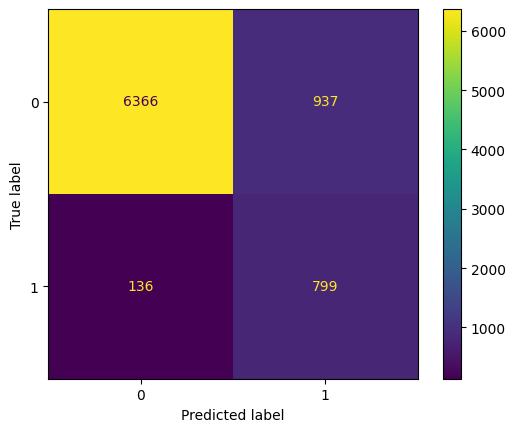

In [92]:
oversampled_confusion_matrix = confusion_matrix(y_test, oversampled_predictions)
print(oversampled_confusion_matrix)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=oversampled_confusion_matrix)
confusion_matrix_display.plot()
plt.show()

#### Classification Report

In [93]:

oversampled_classification_report = classification_report(y_test, oversampled_predictions)
print(oversampled_classification_report)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7303
           1       0.46      0.85      0.60       935

    accuracy                           0.87      8238
   macro avg       0.72      0.86      0.76      8238
weighted avg       0.92      0.87      0.89      8238

